In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import urllib2 #from urllib.request import urlopen   # in Python3
import numpy as np
%matplotlib inline

url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

<type 'numpy.ndarray'>
(315, 600, 3)


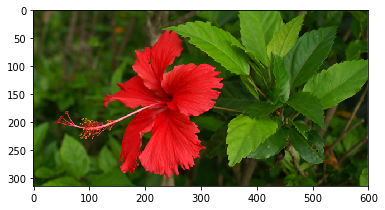

In [2]:
try:
    data = urllib2.urlopen(url) #PNG   #data = urlopen(url) #in Python3
except Exception:
    from io import BytesIO
    data = BytesIO(urllib2.urlopen(url).read()) #JPG   # data = BytesIO(urlopen(url).read())  # in Python3
    
# First, load the image
image = mpimg.imread(data)
print(type(image))

# Print out its shape
print(image.shape)
plt.imshow(image)
plt.show()

In [3]:
import tensorflow as tf
print tf.__version__

1.0.0


(315, 600, 3)
<type 'numpy.ndarray'>
(600, 315, 3)


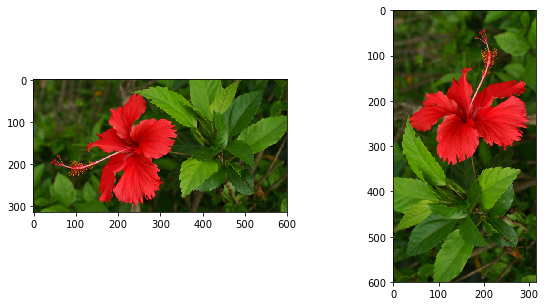

In [4]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.transpose(x, perm=[1, 0, 2])

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print(image.shape)    
print(type(result))
print(result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

(315, 600, 3)
(315, 600, 3)


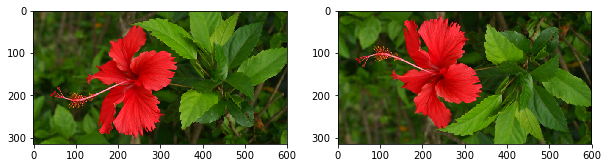

In [9]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.reverse_sequence(x, [height] * width, seq_dim=0, batch_dim=1)
#x = tf.reverse_sequence(x, np.ones((height,)) * width, seq_dim=1, batch_dim=0)

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x)

print image.shape
print result.shape

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

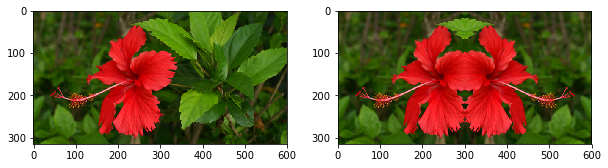

In [12]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x1_half = tf.slice(x, [0, 0, 0], [height, width / 2, 3]) 

x = tf.Variable(image, name='x')
x2 = tf.reverse_sequence(x, [width / 2] * height, seq_dim=1, batch_dim=0)
x2_half = tf.slice(x2, [0, 0, 0], [height, width / 2, 3])

x3 = tf.concat(axis=1, values=[x1_half, x2_half])

with tf.Session() as session:
    model = tf.global_variables_initializer()
    session.run(model)
    result = session.run(x3)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()